In [17]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Peek data
print(df.head())
print("\nShape:", df.shape)
print("\nColumns:", df.columns)
print("\nDescription:\n", housing.DESCR)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Shape: (20640, 9)

Columns: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

Description:
 .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric,

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

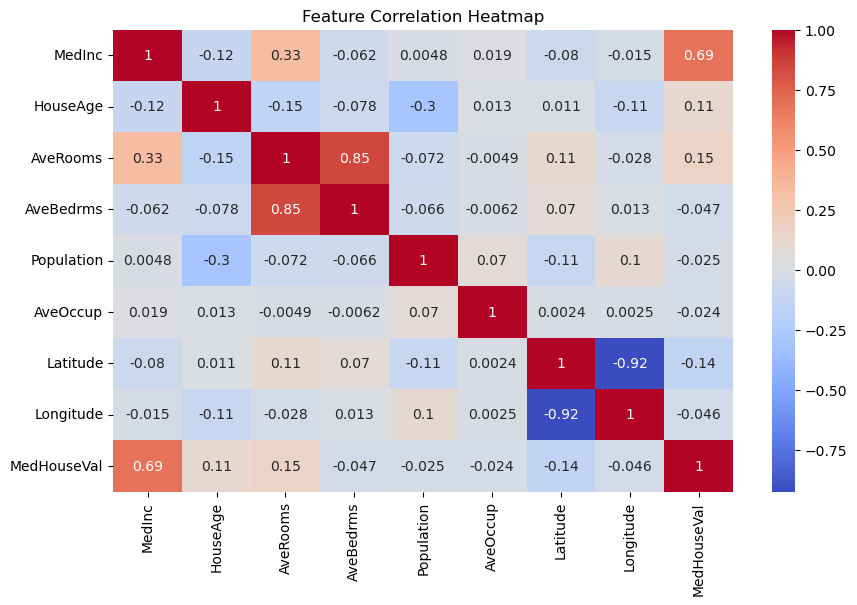

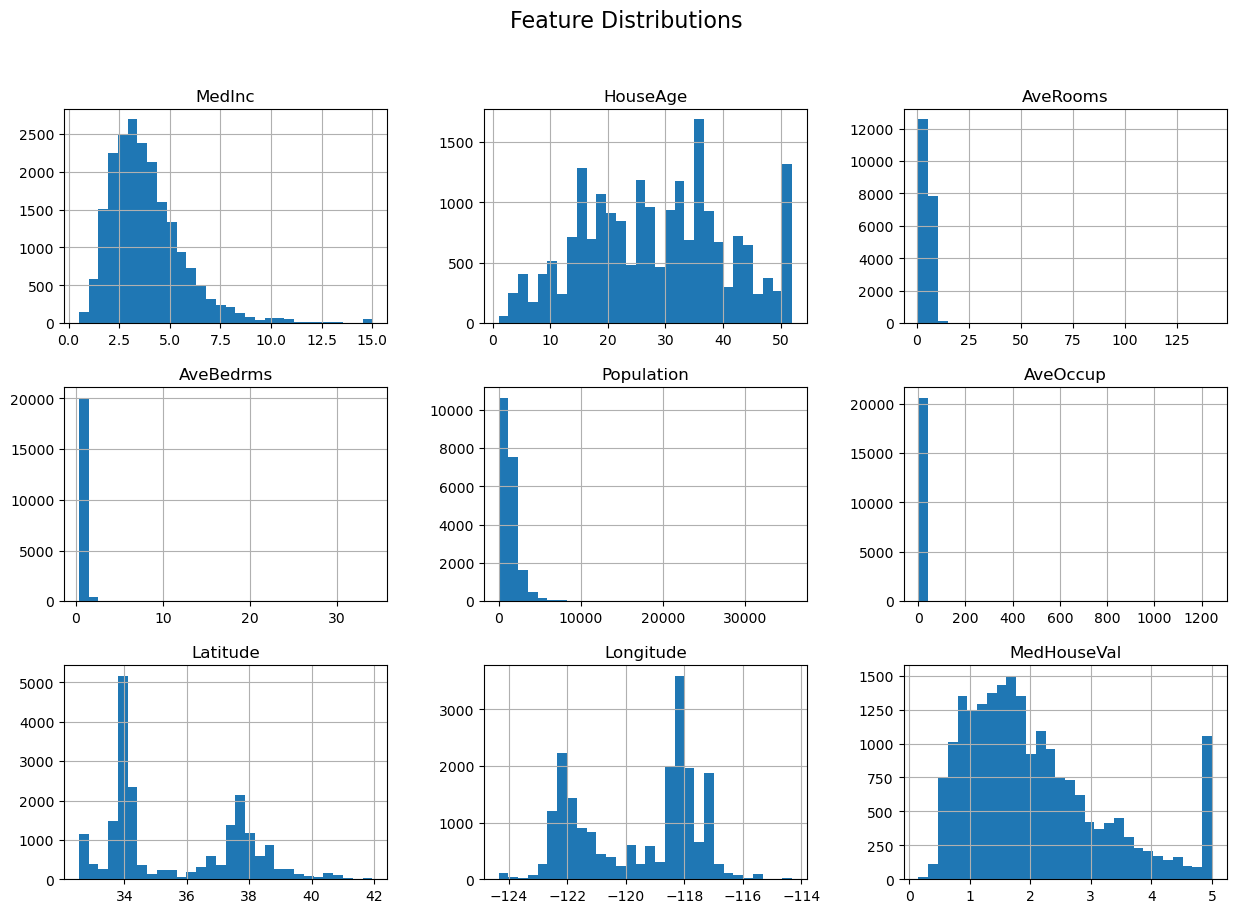

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Histograms for each feature
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features & target
X = df.drop("MedHouseVal", axis=1)  # California Housing target
y = df["MedHouseVal"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train shape: {X_train.shape} | Test shape: {X_test.shape}")


Train shape: (16512, 8) | Test shape: (4128, 8)


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_preds = lin_reg.predict(X_test_scaled)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)

# Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train_scaled, y_train)
elastic_preds = elastic.predict(X_test_scaled)

# Evaluate
models = {
    "Linear Regression": lin_preds,
    "Ridge": ridge_preds,
    "Lasso": lasso_preds,
    "Elastic Net": elastic_preds
}

for name, preds in models.items():
    print(f"{name} → MSE: {mean_squared_error(y_test, preds):.4f} | "
          f"MAE: {mean_absolute_error(y_test, preds):.4f} | "
          f"R²: {r2_score(y_test, preds):.4f}")


Linear Regression → MSE: 0.5559 | MAE: 0.5332 | R²: 0.5758
Ridge → MSE: 0.5559 | MAE: 0.5332 | R²: 0.5758
Lasso → MSE: 0.6796 | MAE: 0.6222 | R²: 0.4814
Elastic Net → MSE: 0.6359 | MAE: 0.5970 | R²: 0.5148


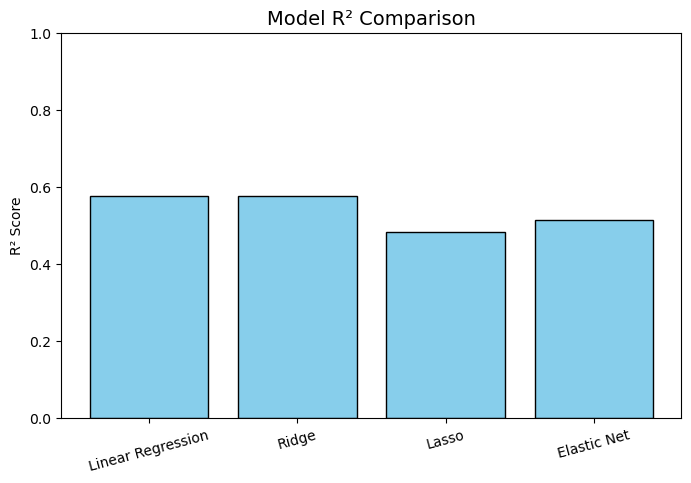

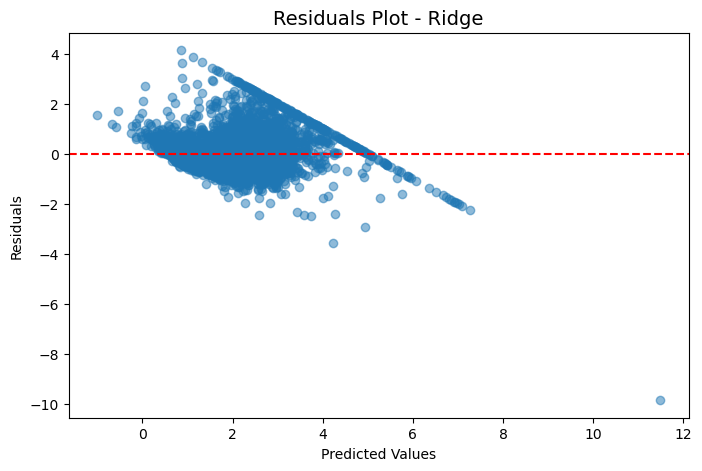

 Best Model Based on R²: Ridge


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Collect R² scores
r2_scores = {
    "Linear Regression": r2_score(y_test, lin_preds),
    "Ridge": r2_score(y_test, ridge_preds),
    "Lasso": r2_score(y_test, lasso_preds),
    "Elastic Net": r2_score(y_test, elastic_preds)
}

#  Bar Plot
plt.figure(figsize=(8,5))
plt.bar(r2_scores.keys(), r2_scores.values(), color="skyblue", edgecolor="black")
plt.title("Model R² Comparison", fontsize=14)
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()

# 📈 Residual Plot for Best Model
best_model = max(r2_scores, key=r2_scores.get)
best_preds = {"Linear Regression": lin_preds, "Ridge": ridge_preds, 
              "Lasso": lasso_preds, "Elastic Net": elastic_preds}[best_model]

residuals = y_test - best_preds
plt.figure(figsize=(8,5))
plt.scatter(best_preds, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f"Residuals Plot - {best_model}", fontsize=14)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

print(f" Best Model Based on R²: {best_model}")
